In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# LOAD THE DATA

In [3]:
df = pd.read_csv('../DataSets/Airbnb_Open_Data.csv..')

C:\Users\donod\AppData\Local\Temp\ipykernel_13816\1143356677.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../DataSets/Airbnb_Open_Data.csv..')


In [4]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# RENAME THE COLUMNS

In [6]:
df=df.rename(columns={'host id':'Host_Id','host name':'Host_Name','neighbourhood group':'Neighbourhood_Group','country code':'Country_Code',
                      'room type':'room_type','Construction year':'Construction_year','service fee':'service_fee','minimum nights':'minimum_nights',
                       'number of reviews': 'number_of_reviews','last review':'last_review', 'reviews per month': 'reviews_per_month',
                       'review rate number': 'review_rate_number','calculated host listings count':'calculated_host_listings_count','availability 365':
                    'availability_365'})

In [7]:

df.columns

Index(['id', 'NAME', 'Host_Id', 'host_identity_verified', 'Host_Name',
       'Neighbourhood_Group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_Code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

# FIND NULL VALUES

In [9]:
df.isnull().sum()

id                                     0
NAME                                 250
Host_Id                                0
host_identity_verified               289
Host_Name                            406
Neighbourhood_Group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
Country_Code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

# CHECK DATA TYPES

In [11]:
df.dtypes

id                                  int64
NAME                               object
Host_Id                             int64
host_identity_verified             object
Host_Name                          object
Neighbourhood_Group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
Country_Code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
Construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

In [12]:
df[df.duplicated(subset=['NAME'],keep=False)]

,id,NAME,Host_Id,host_identity_verified,Host_Name,Neighbourhood_Group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,...,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
32,1019010,Spacious 1 bedroom in luxe building,80369762211,verified,Mary,Manhattan,Harlem,40.81305,-73.95466,United States,...,$102,2.0,88.0,6/14/2019,1.42,NaN,1.0,169.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# DROP UNNECESSARY COLUMNS

In [14]:
df.drop('house_rules', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)

# DROP AND FILL NULL VALUES

# ID

In [17]:
df.id.unique()

array([ 1001254,  1002102,  1002403, ..., 57366313, 57366865, 57367417],
      dtype=int64)

In [18]:
df.id.isnull().sum()

0

# NAME

In [20]:
df.NAME.isnull().sum()

250

In [21]:
df.NAME.unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Elmhurst 1st Fl Rightl Bedroom',
       'Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony',
       'Parisian Style Apartment in Heart of Brooklyn'], dtype=object)

In [22]:
df=df.dropna(subset=['NAME'])

# HOST IDENTITY

In [24]:
df.host_identity_verified.isnull().sum()

277

In [25]:
df.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [26]:
df.host_identity_verified=df.host_identity_verified.fillna('unconfirmed')

# HOST NAME

In [28]:
df.Host_Name.isnull().sum()

400

In [29]:
df.Host_Name.unique()

array(['Madaline', 'Jenna', 'Elise', ..., 'Minh', 'Dier', 'Apostle John'],
      dtype=object)

In [30]:
df.Host_Name=df.Host_Name.fillna('unknown')

# NEIGHBOURHOOD GROUP

In [32]:
df.Neighbourhood_Group.isnull().sum()

27

In [33]:
df.Neighbourhood_Group.unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [34]:
df.Neighbourhood_Group=df.Neighbourhood_Group.replace('brookln','Brooklyn')
df.Neighbourhood_Group=df.Neighbourhood_Group.replace('manhatan','Manhattan')

In [35]:
df.loc[[74,75,76,77,78,90,91,92,148,161,168,196,241,249,262,287,295,319,361,384,415,448,465,488,492,40383,40396],'Neighbourhood_Group'] =['Manhattan', 'Brooklyn','Manhattan','Manhattan','Queens','Brooklyn','Brooklyn','Brooklyn,','Manhattan','Brooklyn',
'Brooklyn','Manhattan','Manhattan','Brooklyn','Bronx','Brooklyn','Manhattan','Brooklyn','Queens','Manhattan','Brooklyn',
 'Brooklyn','Manhattan','Manhattan','Manhattan','Brooklyn','Manhattan']


# NEIGHBOURHOOD

In [37]:
df.neighbourhood.isnull().sum()

16

In [38]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'Chinatown', 'South Slope', 'West Village', 'Williamsburg',
       'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'Clinton Hill', 'Washington Heights', 'Upper East Side',
       'Woodside', 'Brooklyn Heights', 'Prospect Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria',
       'Clason Point', 'Eastch

In [39]:
df.at[517, 'neighbourhood'] = 'Williamsburg'
df.at[547, 'neighbourhood'] = 'East Village'
df.at[553, 'neighbourhood'] =  'Chinatown'
df.at[575, 'neighbourhood'] = 'Upper West Side'
df.at[589, 'neighbourhood'] = 'Fort Greene'
df.at[613, 'neighbourhood'] = 'East Village'
df.at[624, 'neighbourhood'] = 'Turtle Bay'
df.at[633, 'neighbourhood'] = 'Lower East Side'
df.at[643, 'neighbourhood'] = 'Bedford-Stuyvesant'
df.at[670, 'neighbourhood'] = 'East Village'
df.at[678, 'neighbourhood'] = 'East Village'
df.at[681, 'neighbourhood'] = 'Greenpoint'
df.at[726, 'neighbourhood'] = 'Midtown'
df.at[731, 'neighbourhood'] = 'Upper West Side'
df.at[760, 'neighbourhood'] ='Williamsburg'
df.at[770, 'neighbourhood'] ='Borough Park'

# COUNTRY

In [41]:
df.country.unique()

array(['United States', nan], dtype=object)

In [42]:
df.country=df.country.fillna('United States')

# COUNTRY CODE

In [44]:
df.Country_Code.isnull().sum()

123

In [45]:
df.Country_Code.unique()

array(['US', nan], dtype=object)

In [46]:
df.Country_Code=df.Country_Code.fillna('US')

# INSTANT BOOKABLE

In [48]:
df.instant_bookable.isnull().sum()

97

In [49]:
df.instant_bookable.unique()

array([False, True, nan], dtype=object)

In [50]:
df.instant_bookable=df.instant_bookable.fillna('False')

# CANCELLATION POLYCY

In [52]:
df.cancellation_policy.isnull().sum()

71

In [53]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [54]:
df.cancellation_policy=df.cancellation_policy.fillna('unknown')

# CONSTRUCTION YEAR

In [56]:
df.Construction_year.isnull().sum()

205

In [57]:
df.Construction_year.unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

In [58]:
df.Construction_year=df.Construction_year.fillna('0')

# MINIMUM NIGHTS

In [60]:
df.minimum_nights.isnull().sum()

403

In [61]:
df.minimum_nights.unique()

array([ 1.000e+01,  3.000e+01,  3.000e+00,  4.500e+01,  2.000e+00,
        1.000e+00,  5.000e+00,  4.000e+00,  9.000e+01,  7.000e+00,
        1.400e+01,  6.000e+01,        nan,  9.000e+00,  3.100e+01,
        6.000e+00,  1.500e+01,  8.000e+00,  4.700e+01,  8.100e+01,
        1.440e+02,  3.710e+02,  1.490e+02,  2.730e+02,  1.310e+02,
        2.750e+02,  3.230e+02,  5.900e+01,  9.900e+01,  2.680e+02,
       -1.000e+01,  1.890e+02,  3.400e+02,  1.280e+02,  3.500e+02,
        1.660e+02,  1.100e+02,  1.420e+02,  3.660e+02,  2.000e+02,
        5.000e+01,  3.990e+02,  1.700e+01,  1.100e+01,  4.520e+02,
        1.300e+01,  3.455e+03, -5.000e+00,  2.100e+01,  2.700e+01,
        1.800e+01,  3.650e+02, -1.000e+00,  2.000e+01, -1.200e+01,
        4.000e+01,  4.400e+01,  3.980e+02, -2.000e+00,  2.800e+01,
        6.500e+01, -3.000e+00,  2.900e+01,  5.500e+01,  1.200e+02,
        1.800e+02,  1.220e+02,  1.900e+01,  2.400e+02,  8.800e+01,
        1.150e+02,  1.500e+02,  3.700e+02,  1.600e+01,  8.000e

In [62]:
df.minimum_nights=df.minimum_nights.fillna('0')

In [63]:
df.minimum_nights = df.minimum_nights.astype(int)

# NUMBER OF REVIEWS

In [65]:
df.number_of_reviews.isnull().sum()

182

In [66]:
df.number_of_reviews.unique()

array([9.000e+00, 4.500e+01, 0.000e+00, 7.400e+01, 4.900e+01, 4.300e+02,
       1.180e+02, 1.600e+02, 5.300e+01, 1.880e+02, 1.670e+02, 1.130e+02,
       2.700e+01, 1.480e+02, 1.980e+02, 2.600e+02, 1.300e+02, 3.900e+01,
       7.100e+01, 8.800e+01, 1.900e+01, 5.800e+01, 1.080e+02, 2.900e+01,
       2.420e+02, 1.970e+02, 2.730e+02, 1.680e+02, 2.310e+02, 2.140e+02,
       2.450e+02, 1.500e+01, 2.500e+01, 8.100e+01, 9.700e+01, 1.100e+01,
       2.480e+02, 6.100e+01, 1.350e+02, 1.120e+02, 7.300e+01, 8.200e+01,
       3.280e+02, 1.050e+02, 1.910e+02, 4.000e+00, 3.380e+02, 1.060e+02,
       1.900e+02, 2.300e+01, 2.100e+01, 1.420e+02, 1.430e+02, 5.400e+01,
       7.000e+01, 1.600e+01, 9.400e+01, 1.940e+02, 2.000e+00, 1.740e+02,
       2.400e+01, 1.660e+02, 2.330e+02, 6.800e+01, 4.600e+01, 3.350e+02,
       1.620e+02, 1.700e+02, 3.340e+02, 1.200e+01, 4.670e+02, 7.000e+00,
       3.800e+01, 3.240e+02, 1.150e+02, 3.540e+02, 1.950e+02, 1.300e+01,
       3.600e+01, 6.300e+01, 1.550e+02, 1.930e+02, 

In [67]:
df.number_of_reviews=df.number_of_reviews.fillna('0')

# PRICE

In [69]:
df.price.isnull().sum()

244

In [70]:
df.price.unique()

array(['$966 ', '$142 ', '$620 ', ..., '$1,184 ', '$905 ', '$309 '],
      dtype=object)

In [71]:
df.price=df.price.fillna('0')

# SERVICE FEE

In [73]:
df.service_fee.isnull().sum() 

273

In [74]:
df.service_fee.unique()

array(['$193 ', '$28 ', '$124 ', '$41 ', '$115 ', '$14 ', '$212 ',
       '$204 ', '$58 ', '$64 ', '$121 ', '$143 ', '$116 ', '$30 ', nan,
       '$56 ', '$95 ', '$27 ', '$210 ', '$163 ', '$235 ', '$106 ', '$55 ',
       '$42 ', '$86 ', '$133 ', '$154 ', '$102 ', '$172 ', '$109 ',
       '$38 ', '$222 ', '$219 ', '$202 ', '$113 ', '$74 ', '$137 ',
       '$171 ', '$12 ', '$87 ', '$183 ', '$92 ', '$73 ', '$146 ', '$180 ',
       '$67 ', '$51 ', '$181 ', '$88 ', '$165 ', '$129 ', '$207 ', '$17 ',
       '$63 ', '$147 ', '$105 ', '$48 ', '$114 ', '$80 ', '$23 ', '$11 ',
       '$149 ', '$213 ', '$211 ', '$182 ', '$117 ', '$39 ', '$25 ',
       '$216 ', '$53 ', '$10 ', '$118 ', '$72 ', '$101 ', '$61 ', '$177 ',
       '$49 ', '$100 ', '$168 ', '$13 ', '$152 ', '$126 ', '$135 ',
       '$46 ', '$91 ', '$199 ', '$158 ', '$221 ', '$132 ', '$189 ',
       '$90 ', '$186 ', '$66 ', '$225 ', '$220 ', '$19 ', '$238 ',
       '$119 ', '$98 ', '$34 ', '$227 ', '$32 ', '$148 ', '$203 ', '$93 ',
     

# LAST REVIEW

In [76]:
df.last_review.isnull().sum()

15857

In [77]:
df.last_review.unique()

array(['10/19/2021', '5/21/2022', nan, ..., '2/26/2020', '2/25/2020',
       '2/24/2020'], dtype=object)

In [78]:
df.last_review=df.last_review.fillna('0')

# REVIEWS PER MONTH

In [80]:
df.reviews_per_month.isnull().sum()

15843

In [81]:
df.reviews_per_month.unique()

array([ 0.21,  0.38,   nan, ...,  7.73, 24.49, 33.08])

In [82]:
df.reviews_per_month=df.reviews_per_month.fillna('0')

In [83]:
df.review_rate_number.isnull().sum()

318

# REVIEW RATE

In [85]:
df.review_rate_number.unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

In [86]:
df.review_rate_number=df.review_rate_number.fillna('0')

# CALCULATED HOST LISTINGS COUNT

In [88]:
df.calculated_host_listings_count.isnull().sum()

318

In [89]:
df.calculated_host_listings_count.unique()

array([  6.,   2.,   1.,   4.,   3.,  nan,   5.,   7.,  13.,  28.,  11.,
         8.,   9.,  52.,  18.,  15.,  19.,  10.,  39.,  26.,  29.,  12.,
        21.,  96.,  14.,  34.,  43., 121.,  37.,  49.,  31.,  91.,  16.,
        87.,  33.,  23.,  50.,  20.,  25., 232.,  17.,  47., 103.,  65.,
        30.,  27., 327.,  32.,  45.,  53., 208., 171.,  44.,  48., 108.,
        51., 161., 152.,  83.,  24.,  22., 126.,  54.,  66.,  59.,  62.,
       102., 186., 125.,  55.,  63.,  67.,  58.,  56.,  80.,  46., 218.,
        86., 332.])

In [90]:
df.calculated_host_listings_count=df.calculated_host_listings_count.fillna('0')

# AVAILABILITY

In [92]:
df.availability_365.isnull().sum()

430

In [93]:
df.availability_365.unique()

array([ 2.860e+02,  2.280e+02,  3.520e+02,  2.890e+02,  3.740e+02,
        2.240e+02,  2.190e+02,  1.800e+02,  3.750e+02,  1.000e+00,
        1.630e+02,  2.580e+02,  4.700e+01,  6.800e+01,  1.000e+02,
        1.970e+02,  9.600e+01,  3.250e+02,  3.450e+02,  3.470e+02,
        1.930e+02,  5.400e+01,  9.000e+00,  3.440e+02,  3.720e+02,
        1.030e+02,  1.720e+02,  5.600e+01,  1.050e+02,  1.690e+02,
        3.830e+02,  4.110e+02,  7.600e+01,  4.160e+02,  2.940e+02,
        2.140e+02,  3.560e+02,  1.100e+02,  3.540e+02,  3.300e+01,
        4.050e+02,  8.600e+01,  1.520e+02,  3.530e+02,  2.600e+01,
        3.200e+01,  8.500e+01,        nan,  8.200e+01,  2.010e+02,
        3.280e+02,  3.930e+02,  6.100e+01,  2.670e+02,  1.890e+02,
        8.300e+01,  4.000e+02,  3.400e+01,  2.030e+02,  3.500e+01,
        2.800e+02,  4.170e+02,  1.620e+02,  2.420e+02,  2.270e+02,
        1.730e+02,  1.460e+02,  2.430e+02,  4.250e+02,  1.130e+02,
        2.600e+02,  3.950e+02,  2.660e+02,  5.800e+01,  4.100e

In [94]:
df.availability_365=df.availability_365.fillna('0')

# CHANGE DATA TYPES

In [96]:
df.price = df.price.astype(str).str.replace('[$ , ]', '', regex=True).astype('float64')

In [97]:
df.service_fee = pd.to_numeric(df.service_fee, errors="coerce")

In [98]:
df.service_fee = df.service_fee.replace('[$ , ]', '', regex=True).astype('float64')

In [99]:
df["service_fee"].fillna(df["price"]*0.20,inplace=True)

C:\Users\donod\AppData\Local\Temp\ipykernel_13816\3850242677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["service_fee"].fillna(df["price"]*0.20,inplace=True)


In [100]:
df.last_review = pd.to_datetime(df.last_review,errors='coerce')

In [101]:
df.minimum_nights = df.minimum_nights.astype(str).str.replace(r"[-]","",regex=True).str.strip()

In [103]:
df.minimum_nights = pd.to_numeric(df.minimum_nights, errors="coerce").astype("Int64")

In [104]:
df.review_rate_number=df.review_rate_number.astype("int")

In [105]:
df["Construction_year"] = pd.to_numeric(df["Construction_year"], errors="coerce").astype("Int64")

In [106]:
df['availability_365'] = df['availability_365'].astype(str).str.replace("-", "").astype('float64')

print(df['availability_365'].dtype) 

float64


# OUTLIERS

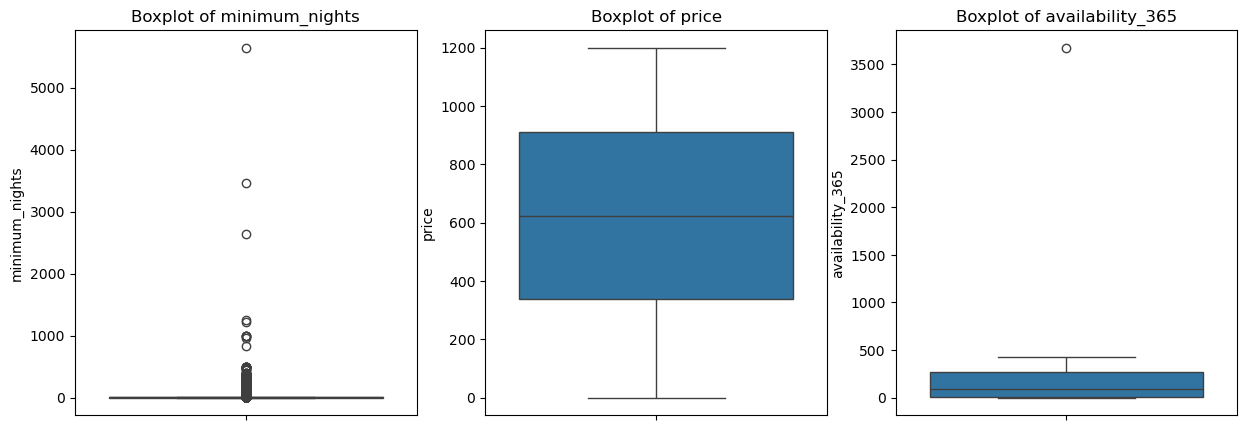

In [108]:
columns_to_check = ["minimum_nights", "price", "availability_365"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sb.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


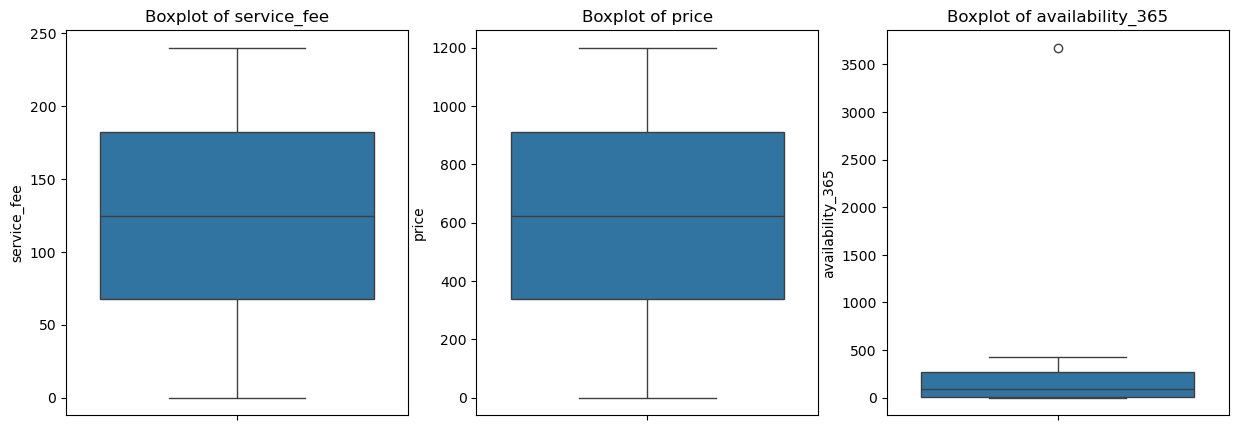

In [109]:
columns_to_check = ["service_fee", "price", "availability_365"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sb.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


# ANALYSIS:

# 1]DISCRIPTIVE ANALYSIS¶

In [112]:
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 102349 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102349 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   Host_Id                         102349 non-null  int64         
 3   host_identity_verified          102349 non-null  object        
 4   Host_Name                       102349 non-null  object        
 5   Neighbourhood_Group             102349 non-null  object        
 6   neighbourhood                   102349 non-null  object        
 7   lat                             102341 non-null  float64       
 8   long                            102341 non-null  float64       
 9   country                         102349 non-null  object        
 10  Country_Code                    102349 non-nul

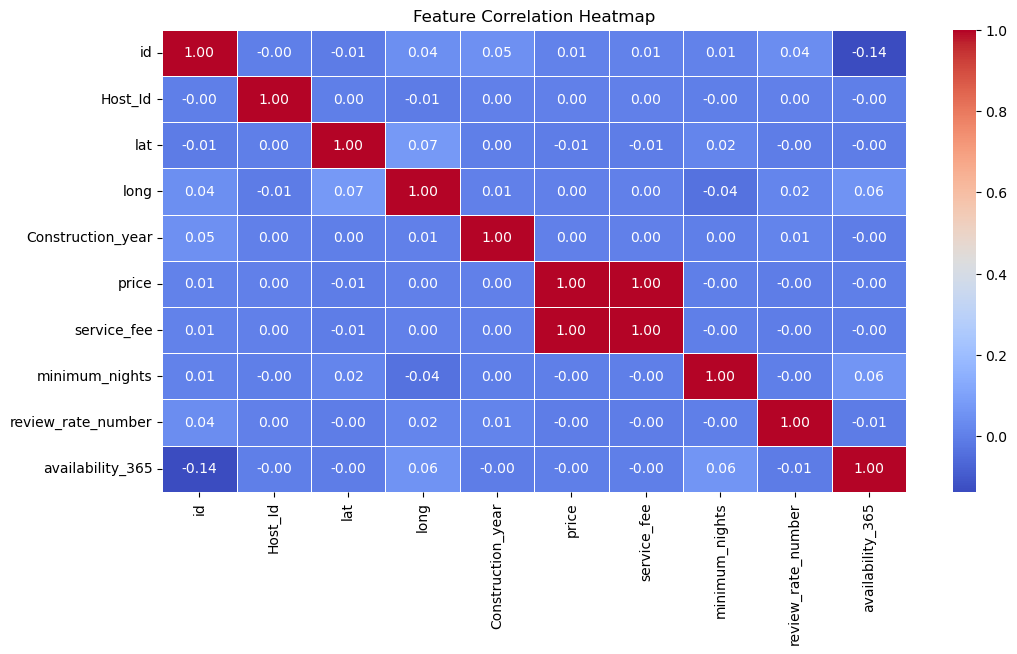

In [113]:
# Heatmap for representing the positive relationship
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(12,6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#Insights from the Feature Correlation Heatmap:

1.Price and Service Fee: A perfect correlation (1.00) indicates that service fees directly scale with listing prices.

2.No Significant Correlations: Most other variables have very low correlations, suggesting minimal linear relationships.
    
3.Availability and ID: A slight negative correlation (-0.14) may indicate that newer listings tend to have lower availability.

4.Latitude and Longitude: Minimal correlation between geographic coordinates and other variables, implying location might not directly affect price or availability in this dataset.

5.Review Rate and Other Factors: The review rate number shows no strong correlation with price or availability, meaning reviews may not significantly impact these aspects.

# 2]DEMOGRAPHIC ANALYSIS
# 1. Listings by Neighborhood_Group & Neighborhood

C:\Users\donod\AppData\Local\Temp\ipykernel_13816\936327958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_neighborhood_group.index, y=top_neighborhood_group.values, palette="coolwarm")


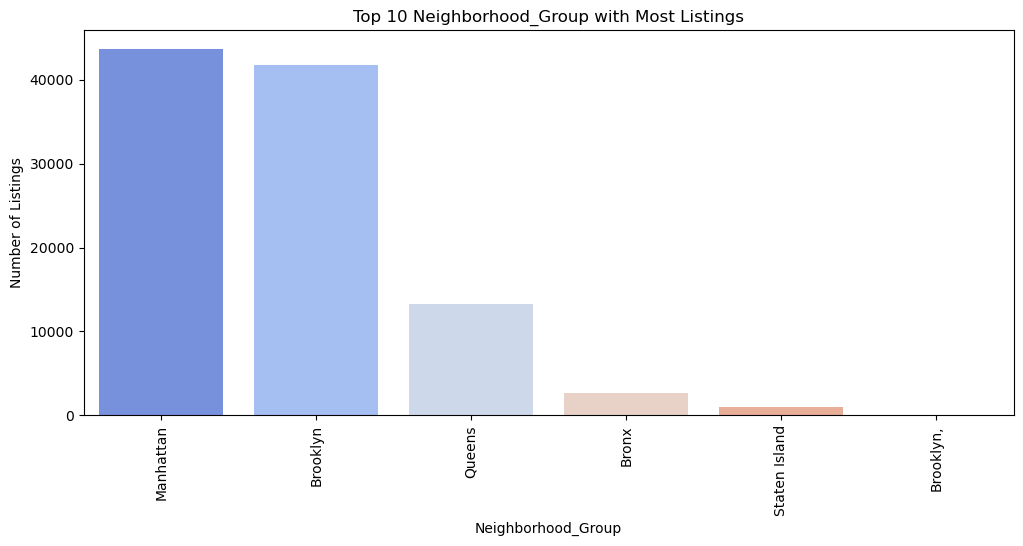

In [116]:
# Listings Count Per Neighborhood_Group
plt.figure(figsize=(12,5))
top_neighborhood_group = df["Neighbourhood_Group"].value_counts().head(10)
sb.barplot(x=top_neighborhood_group.index, y=top_neighborhood_group.values, palette="coolwarm")
plt.title("Top 10 Neighborhood_Group with Most Listings")
plt.xlabel("Neighborhood_Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.show()

#Insights fron theListings Count Per Neighborhood_Group:

1.The two neighbourhoods with the most listings—Manhattan and Brooklyn—are far more numerous than the others.

2.Despite having a significant number of listings, Queens is a distant third compared to Manhattan and Brooklyn.

3.Staten Island and the Bronx Have Very Few Listings: In comparison to the top three, these localities have a lot less listings.

4.Skewed Distribution: The bulk of listings are found in Manhattan and Brooklyn, suggesting that there is more supply or demand in these locatios.


C:\Users\donod\AppData\Local\Temp\ipykernel_13816\2917042828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_price_neighborhood_group.index, y=avg_price_neighborhood_group.values, palette="magma")


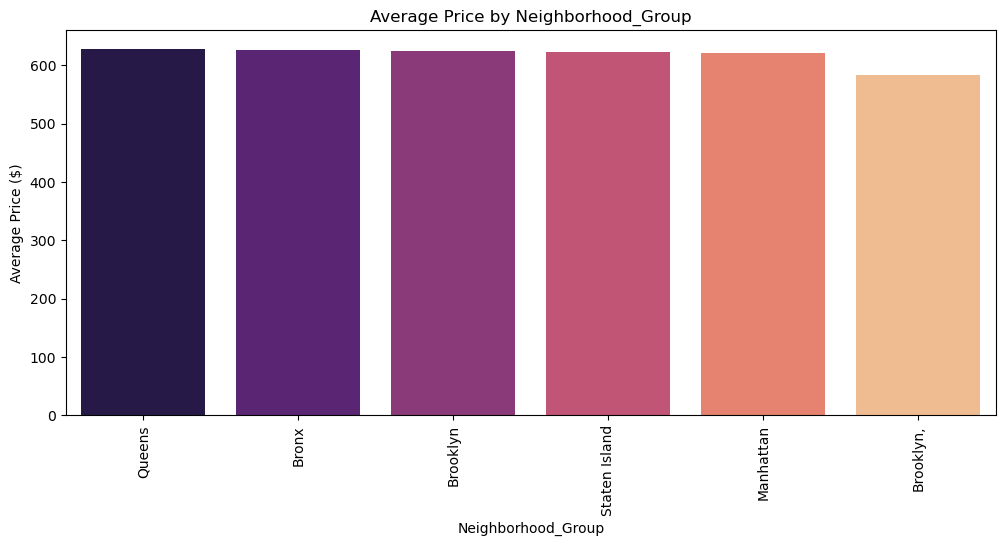

In [216]:
# Average Price by Neighborhood_Group
plt.figure(figsize=(12,5))
avg_price_neighborhood_group = df.groupby("Neighbourhood_Group")["price"].mean().sort_values(ascending=False)
sb.barplot(x=avg_price_neighborhood_group.index, y=avg_price_neighborhood_group.values, palette="magma")
plt.title("Average Price by Neighborhood_Group")
plt.xlabel("Neighborhood_Group")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()


#Key Insights from the Average Price by Neighborhood Chart:

 1. Similar Pricing Across Neighborhoods – All neighborhoods have nearly the same average price, around 620(dollar)- 630(dollar).

 2. No Major Price Differences – Despite large variations in listing numbers, pricing remains consistent across areas.

 3. Staten Island & Bronx Are Not Cheaper – Even though these areas have fewer listings, their average prices are still comparable to Manhattan and Brooklyn.

4. Possible Impact of Luxury Listings – High prices in areas with fewer listings (like Staten Island) may suggest the presence of luxury rentals.

C:\Users\donod\AppData\Local\Temp\ipykernel_13816\691298359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")


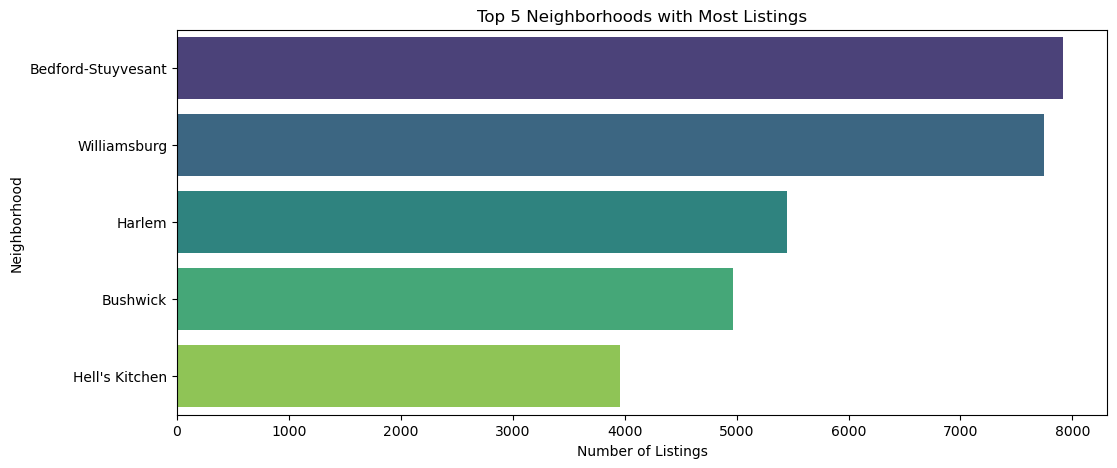

In [218]:
#  Listing by Neighborhoods
plt.figure(figsize=(12,5))
top_neighborhoods = df["neighbourhood"].value_counts().head(5)  

sb.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")

plt.title("Top 5 Neighborhoods with Most Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

#Insights from the  Listing by Neighborhoods:

1.Bedford-Stuyvesant has the highest number of Airbnb listings, followed closely by Williamsburg. Both neighborhoods are in Brooklyn, indicating that this borough has a high concentration of Airbnb properties.

2.Harlem and Bushwick also have a significant number of listings, suggesting they are popular locations for short-term rentals.

3.Hell’s Kitchen, Upper West Side, and Upper East Side in Manhattan have strong representation, showing continued demand for Airbnb stays in these prime areas.

4.Most of the top neighborhoods are in Brooklyn and Manhattan, which are tourist hotspots with high demand for accommodations.

5.East Harlem, Crown Heights, and Midtown also show a considerable number of listings, reflecting their increasing popularity among travelers

6.Astoria (Queens) appears at the bottom of the list, suggesting that while it has a decent number of listings, it is less dominant compared to Brooklyn and Manhattan neighborhoods.

C:\Users\donod\AppData\Local\Temp\ipykernel_13816\2363579631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_price_neigh.values, y=avg_price_neigh.index, palette="coolwarm")


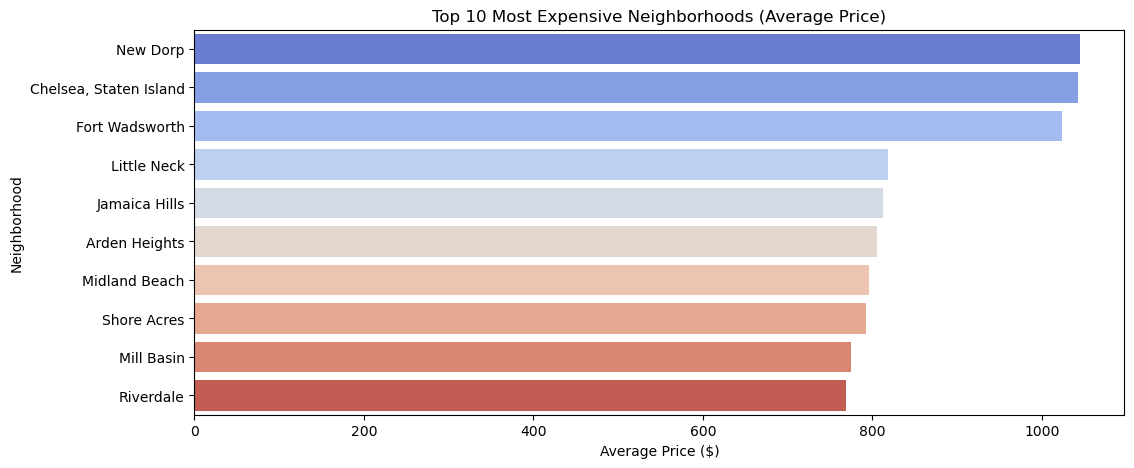

In [122]:
# Avrage price per Neighborhood
plt.figure(figsize=(12,5))
avg_price_neigh = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10) 

sb.barplot(x=avg_price_neigh.values, y=avg_price_neigh.index, palette="coolwarm")

plt.title("Top 10 Most Expensive Neighborhoods (Average Price)")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighborhood")
plt.show()

#Insighs from Avrage price per Neighborhood:

1.New Dorp and Chelsea, Staten Island have the highest average prices, exceeding $1000 per night, indicating they are premium areas.
    
2.Fort Wadsworth is also among the top three, suggesting its popularity or exclusivity.

3.Other neighborhoods like Little Neck and Jamaica Hills have comparatively lower average prices but remain among the most expensive, with prices around $700-$800.

4.The variation in average prices suggests a combination of factors like luxury accommodations, location desirability, and property type.
    
5.Riverdale has the lowest average price among the top 10 but still remains a high-cost neighborhood compared to the general market.



C:\Users\donod\AppData\Local\Temp\ipykernel_13816\719473879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="crest")


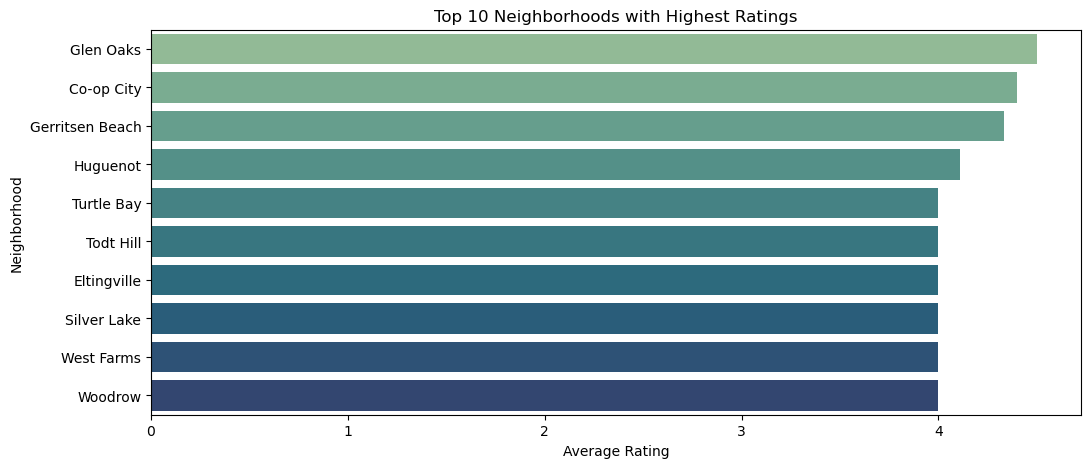

In [220]:
# Rating wise Neighbourhood
plt.figure(figsize=(12,5))
avg_ratings = df.groupby("neighbourhood")["review_rate_number"].mean().sort_values(ascending=False).head(10)

sb.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="crest")

plt.title("Top 10 Neighborhoods with Highest Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Neighborhood")
plt.show()

#Insights from Neighborhoods with Highest Ratings:

1.Glen Oaks has the highest average rating, indicating it offers exceptional guest experiences.
    
2.Co-op City and Gerritsen Beach also rank highly, reflecting positive feedback from guests.
    
3.The majority of neighborhoods have average ratings close to 4.0 or higher, indicating overall guest satisfaction.
    
4.Neighborhoods like Clifton and Oakwood have comparatively lower ratings, suggesting areas for potential improvement.

5.Consistently high ratings may indicate well-maintained properties, good amenities, and responsive hosts.

C:\Users\donod\AppData\Local\Temp\ipykernel_17420\3603999968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_rated["NAME"], y=top_rated["minimum_nights"], palette="coolwarm")


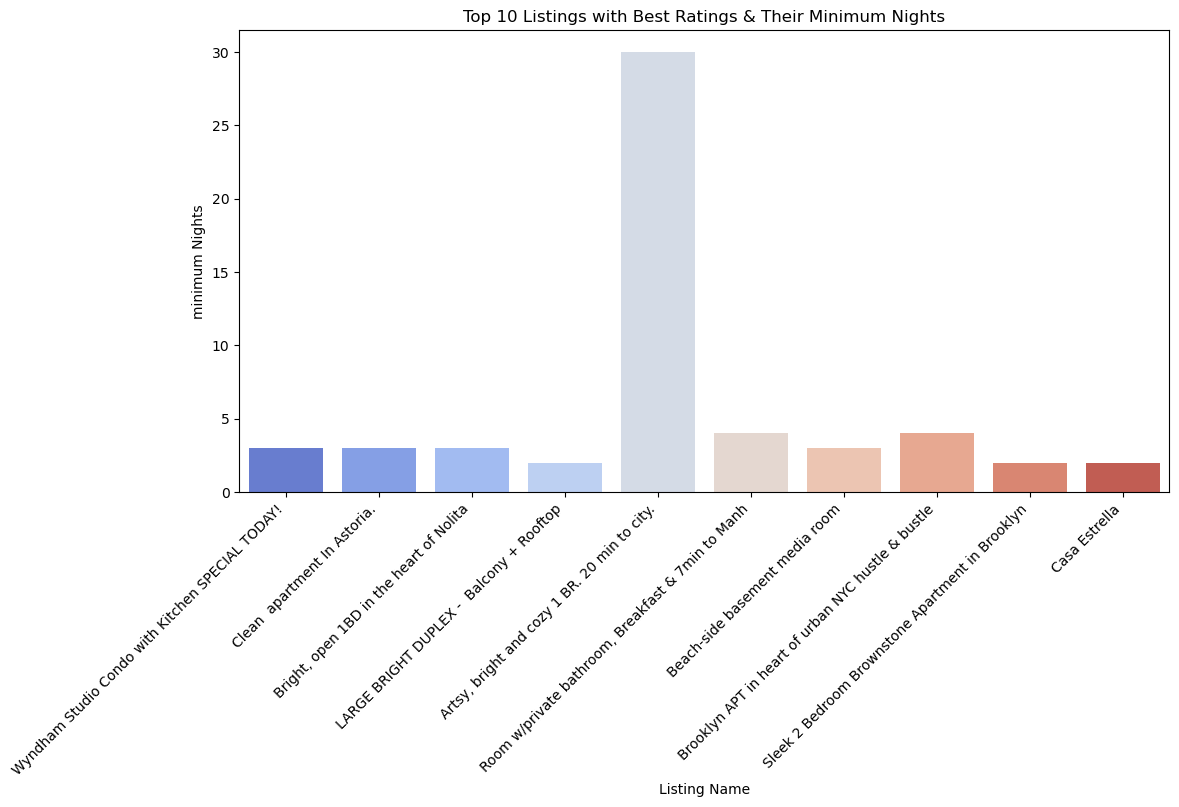

,NAME,review_rate_number,minimum_nights,neighbourhood,Neighbourhood_Group
19243,Wyndham Studio Condo with Kitchen SPECIAL TODAY!,5,3,Midtown,Manhattan
62120,Clean apartment In Astoria.,5,3,Astoria,Queens
22780,"Bright, open 1BD in the heart of Nolita",5,3,Little Italy,Manhattan
62061,LARGE BRIGHT DUPLEX - Balcony + Rooftop,5,2,Bedford-Stuyvesant,Brooklyn
22778,"Artsy, bright and cozy 1 BR. 20 min to city.",5,30,Bushwick,Brooklyn
62062,"Room w/private bathroom, Breakfast & 7min to Manh",5,4,Williamsburg,Brooklyn
62070,Beach-side basement media room,5,3,New Dorp Beach,Staten Island
62072,Brooklyn APT in heart of urban NYC hustle & bu...,5,4,Bedford-Stuyvesant,Brooklyn
62073,Sleek 2 Bedroom Brownstone Apartment in Brooklyn,5,2,Bedford-Stuyvesant,Brooklyn
22770,Casa Estrella,5,2,Bushwick,Brooklyn


In [360]:
# Filter data: Keep only rows with valid ratings, sort by Ratings, and select top 10
top_rated = df.dropna(subset=["review_rate_number"]).sort_values(by="review_rate_number", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sb.barplot(x=top_rated["NAME"], y=top_rated["minimum_nights"], palette="coolwarm")

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Listings with Best Ratings & Their Minimum Nights")
plt.xlabel("Listing Name")
plt.ylabel("minimum Nights")

plt.show()

top_rated[["NAME", "review_rate_number", "minimum_nights", "neighbourhood", "Neighbourhood_Group"]]

#Insights for the Listings with Best Ratings & Their Minimum Nights

1.Most listings have a low minimum night requirement, typically around 2 to 4 nights, making them attractive for short-term travelers.
                                                                                                          
2.One listing, located in Co-op City, has a significantly higher minimum stay of 30 nights, indicating it may cater to long-term guests or corporate housing.

3.Despite the difference in minimum night requirements, all these listings have high ratings, suggesting guest satisfaction is not heavily influenced by stay duration.

4.Properties with flexible minimum night policies may have a broader appeal to tourists, while long-stay properties may target business or relocation travelers.

# 2. Listings by Room Type


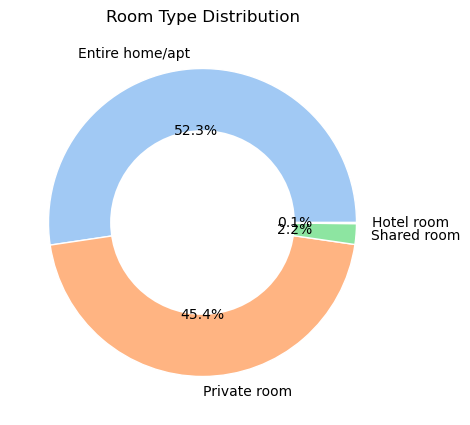

In [363]:
#Room Type Distribution
plt.figure(figsize=(8, 5))
sizes = df["room_type"].value_counts()
colors = sb.color_palette("pastel")
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%", colors=colors, wedgeprops={"edgecolor": "white"})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white")) 
plt.title("Room Type Distribution")
plt.show()


#Key Insights from the Room Type Distribution Chart:

1.Entire Home/Apt Dominates (52.4%) – Most listings are full apartments or homes, indicating a focus on vacation rentals rather than shared spaces.

2.Private Rooms Are Also Popular (45.4%) – A significant portion of listings are private rooms, likely targeting budget travelers or shared living arrangements
.
3.Shared Rooms & Hotel Rooms Are Rare (<2.3%) – Very few listings are shared rooms or hotel-style accommodations, showing a preference for private stays.

4.Implication for Travelers – Travelers have a nearly even split between renting an entire place and a private room, with limited shared or hotel-style options.

C:\Users\donod\AppData\Local\Temp\ipykernel_17420\2543989616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.pointplot(x="room_type", y="price", data=df, estimator=np.mean, palette="coolwarm")


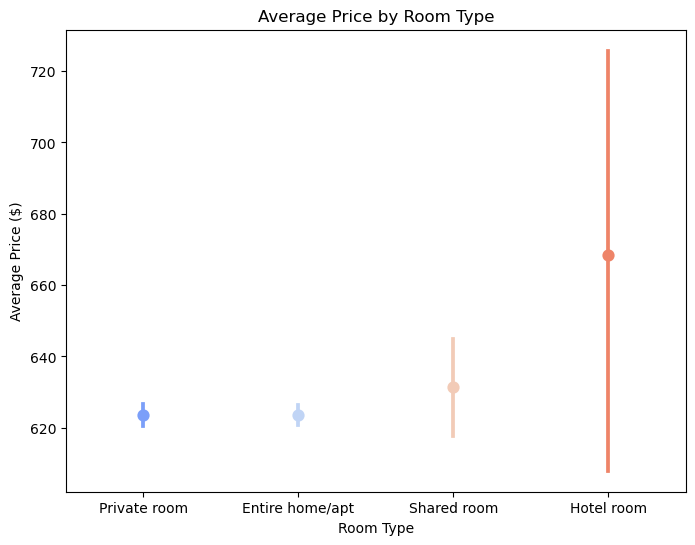

In [365]:
#Room Type vs Price
plt.figure(figsize=(8, 6))
sb.pointplot(x="room_type", y="price", data=df, estimator=np.mean, palette="coolwarm")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()


Key Insights from the Average Price by Room Type Chart:
1. Hotel Rooms Have High Price Variability – Hotel rooms show the widest price range, with prices varying significantly.
2. Private Rooms & Entire Homes Have Similar Prices – Their average prices are close, suggesting comparable affordability.
3. Shared Rooms Are Slightly More Expensive – The average price is a bit higher than private rooms, possibly due to premium shared accommodations.
4. Hotel Rooms Are the Most Expensive on Average – Despite high variability, hotels tend to have the highest average price.


df.head()

# 3. Host Identity & Superhost Analysis

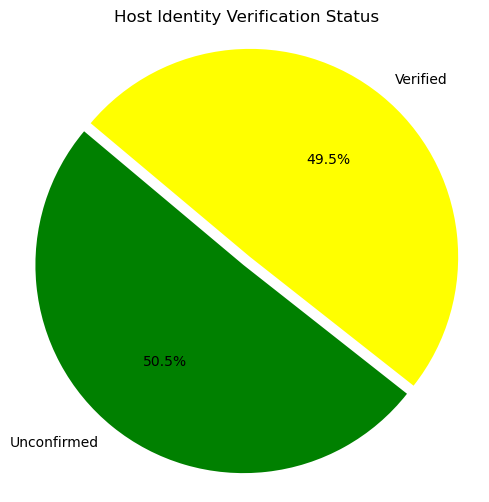

In [370]:
#Host Identity Verification Status
labels = ['Unconfirmed', 'Verified']
sizes = [51000, 50000]  
colors = ['green', 'yellow']
explode = (0.05, 0)  
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Host Identity Verification Status')
plt.show()


#Insights from the "Host Identity Verification Status":

1.50.5% of hosts are unverified, meaning they haven't confirmed their identity. This could raise trust and safety concerns for guests.

2.49.5% of hosts are verified, indicating that nearly half of the hosts have completed the identity verification process, promoting a safer and more reliable platform.

3.The slight dominance of unverified hosts suggests there may be room for Airbnb to encourage more hosts to verify their identities through incentives or stricter guidelines.

4.Verified hosts often build more trust with guests, which can lead to higher booking rates and better reviews.

5.Platforms could highlight verified hosts or provide visibility boosts as an incentive to increase verification rates.

C:\Users\donod\AppData\Local\Temp\ipykernel_17420\3978204134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="host_identity_verified", y="price", data=df, palette="Set2")


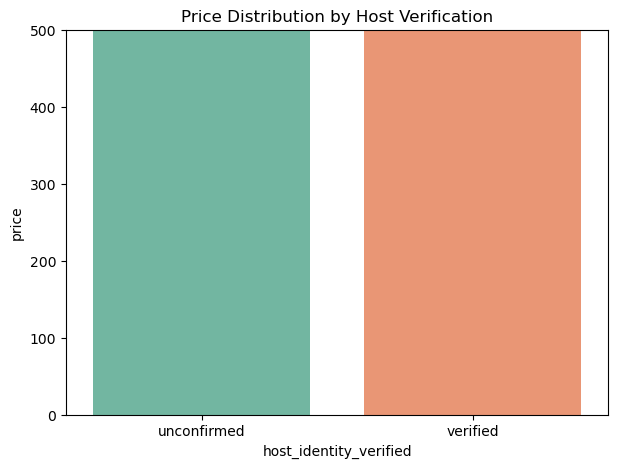

In [372]:
# Impact of Verification on Price
plt.figure(figsize=(7,5))
sb.barplot(x="host_identity_verified", y="price", data=df, palette="Set2")
plt.title("Price Distribution by Host Verification")
plt.ylim(0, 500) 
plt.show()

#Insights from the Impact of Verification on Price

1.Similar Price Distribution: The price distribution for both verified and unconfirmed hosts appears quite similar. 
This suggests that host verification status may not significantly influence the pricing strategy.

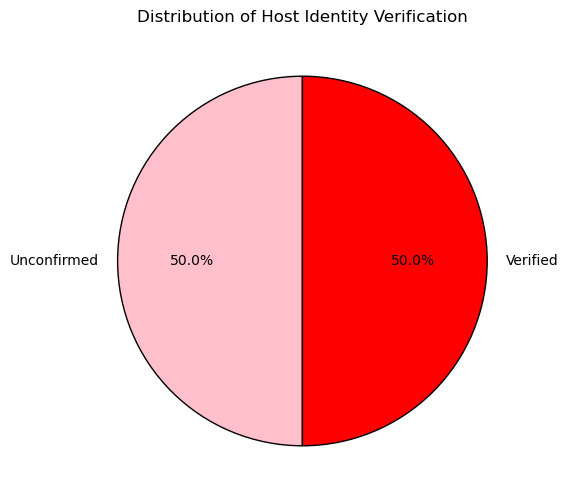

In [374]:
#Host Identity Verification vs. Ratings
labels = ['Unconfirmed', 'Verified']
sizes = [50, 50] 
colors = ['pink', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Host Identity Verification')

plt.show()

#Insights from the Host Identity Verification vs. Ratings

1.Equal Distribution:
The chart indicates a 50-50% split between verified and unconfirmed hosts. 
This suggests that half of the hosts have verified their identity, while the other half have not.

C:\Users\donod\AppData\Local\Temp\ipykernel_17420\3871546454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_price.index, y=avg_price.values, palette="muted")


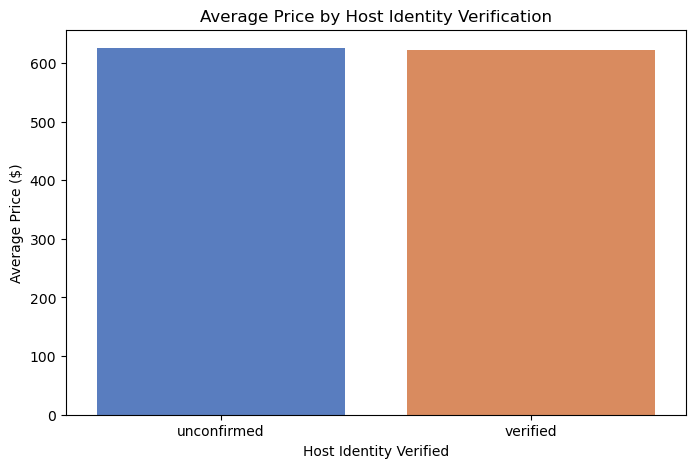

In [376]:
#Host Identity Verification vs. Average Price
plt.figure(figsize=(8,5))
avg_price = df.groupby("host_identity_verified")["price"].mean()

sb.barplot(x=avg_price.index, y=avg_price.values, palette="muted")

plt.title("Average Price by Host Identity Verification")
plt.xlabel("Host Identity Verified")
plt.ylabel("Average Price ($)")
plt.show()

#Insights:"Average Price by Host Identity Verification"

1.Minimal Difference in Pricing:
The average prices for verified and unconfirmed hosts are almost the same, both around $620. This suggests that host verification does not significantly impact the pricing of listings.

# 4. Availability Patterns Across Locations


C:\Users\donod\AppData\Local\Temp\ipykernel_17420\1053188408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=availability_by_neighborhood.index, y=availability_by_neighborhood.values, palette="cividis")


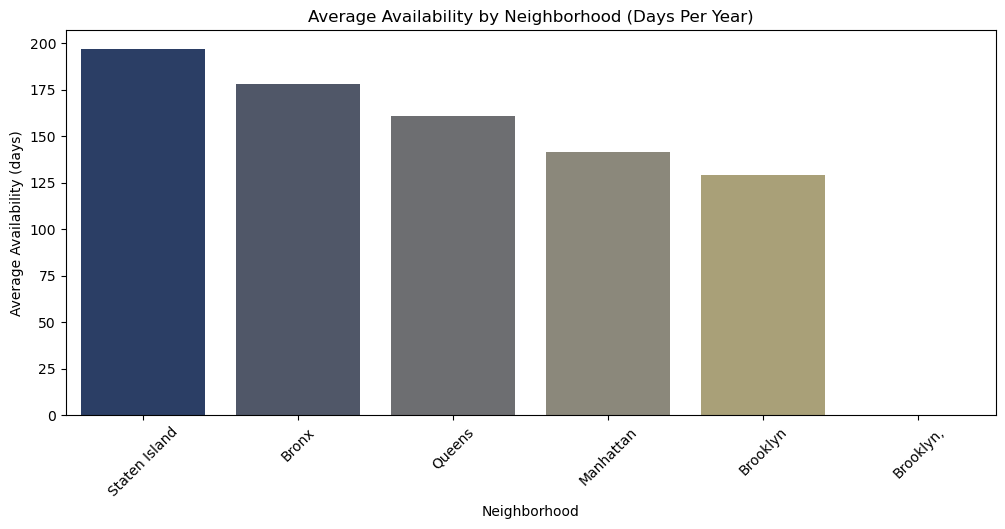

In [379]:
#Availability Per Neighborhood
plt.figure(figsize=(12,5))
availability_by_neighborhood = df.groupby("Neighbourhood_Group")["availability_365"].mean().sort_values(ascending=False)
sb.barplot(x=availability_by_neighborhood.index, y=availability_by_neighborhood.values, palette="cividis")
plt.title("Average Availability by Neighborhood (Days Per Year)")
plt.xlabel("Neighborhood")
plt.ylabel("Average Availability (days)")
plt.xticks(rotation=45)
plt.show()


#Insights:"Average Availability by Neighborhood"

1.Staten Island Has the Highest Availability:
Listings in Staten Island have the highest average availability, close to 200 days. This may suggest a lower occupancy rate or fewer bookings compared to more touristy areas.

2.Bronx and Queens Follow:
Bronx and Queens also show relatively high availability (175 and 160 days respectively). These areas may be less in demand compared to prime locations like Manhattan.

3.Lower Availability in Manhattan and Brooklyn:
Manhattan and Brooklyn have lower availability, around 130 to 140 days. These neighborhoods are popular tourist destinations, leading to higher occupancy rates and fewer available days.

4.Duplicate Label Error:
There is a label issue with Brooklyn appearing twice, with one abbreviated as "Brooklyn." This may indicate a data labeling or preprocessing error that should be corrected.

5.Potential Pricing Strategy:
Hosts in neighborhoods with lower availability may adopt premium pricing strategies due to higher demand. In contrast, areas with higher availability may offer more competitive pricing to attract guests.

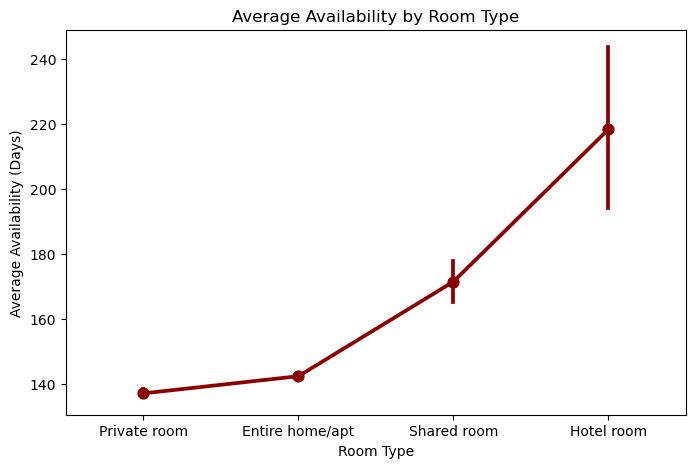

In [382]:
#Availability by Room Type
plt.figure(figsize=(8,5))
sb.pointplot(x="room_type", y="availability_365", data=df, estimator=np.mean, color="darkred", markers="o", linestyles="-")
plt.title("Average Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days)")
plt.show()

#Insights:Availability by Room Type

1.Hotel Rooms Have the Highest Availability:
Hotel rooms show the highest average availability, around 220 days. This is likely because hotels are commercially operated and generally maintain year-round availability.

2.Shared Rooms Have Moderate Availability:
Shared rooms come next with an average availability of approximately 170 days, suggesting they are often available but may have limitations depending on the host's schedule.

3.Entire Homes/Apartments and Private Rooms Have Lower Availability:
Entire homes and private rooms have lower availability (140 to 150 days). This could be because hosts often rent them out seasonally or for personal use during part of the year.

4.Variation in Availability:
Error bars indicate variability, particularly for hotel rooms, meaning their availability can fluctuate significantly based on demand, events, or seasonal factors.

# 3]CANCELLATION POLYCY ANALYSIS

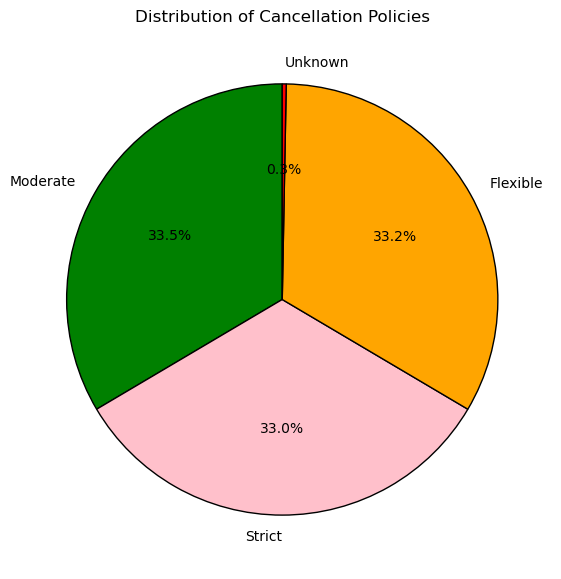

In [224]:
#Cancellation Policy Distribution – 
labels = ['Moderate', 'Strict', 'Flexible', 'Unknown']
sizes = [34000, 33500, 33700, 300]  
colors = ['green', 'pink', 'orange', 'red']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Cancellation Policies')

plt.show()

#Insights:"Distribution of Cancellation Policies"

1.Balanced Distribution:
The cancellation policies are quite evenly distributed, with Moderate (33.5%), Flexible (33.2%), and Strict (33.0%) policies having nearly equal representation.
This indicates that hosts are using different strategies depending on their preferences and property types.

2.Minimal Unknown Policies:
A very small percentage (0.3%) of listings have unknown or unspecified cancellation policies. This could be due to incomplete data or newly created listings.

3.Host Preferences:
The relatively balanced distribution suggests that hosts may choose cancellation policies based on their confidence in securing bookings or reducing financial loss.

4.Guest Choices:
With a good number of listings offering flexible or moderate policies, guests have plenty of options if they prefer flexibility over strict policies.

# Distribution of Listings by Construction Year

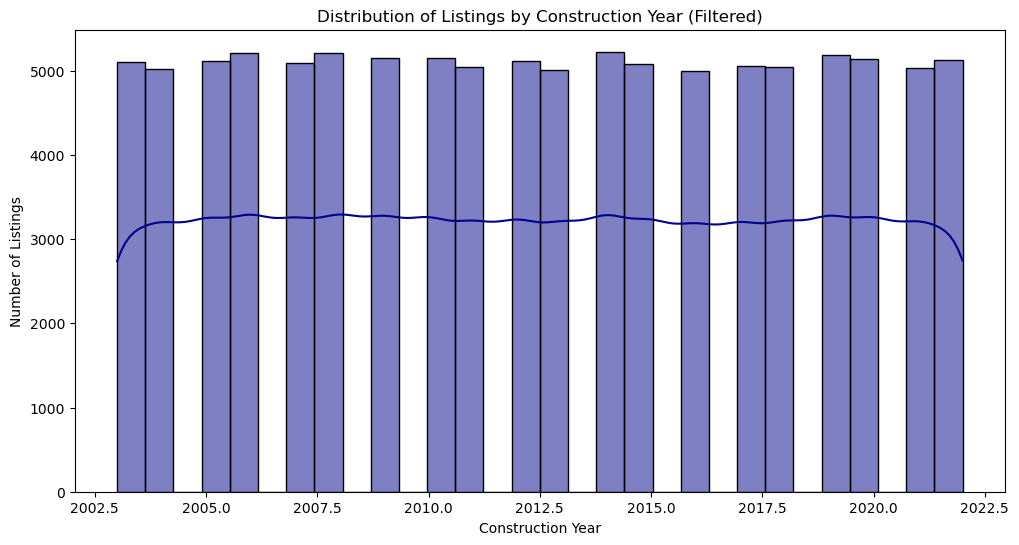

In [232]:
# Convert to integers (if not already)
df["Construction_year"] = pd.to_numeric(df["Construction_year"], errors='coerce')
df_cleaned = df[(df["Construction_year"] >= 1900) & (df["Construction_year"] <= 2025)]
plt.figure(figsize=(12,6))
sb.histplot(df_cleaned["Construction_year"].dropna(), bins=30, kde=True, color="darkblue")
plt.title("Distribution of Listings by Construction Year (Filtered)")
plt.xlabel("Construction Year")
plt.ylabel("Number of Listings")
plt.show()

#Insights from the Distribution ofListings By Construction Year:

1.Consistent Number of Listings:
The number of listings seems relatively stable across different construction years.
Most years show around 5000 listings.

2.Slight Drop in Recent Years:
There's a noticeable decline in listings for properties constructed around 2021-2022.
This might be due to incomplete data or fewer new constructions listed recently.

3.Stable Trend in Older Listings:
Listings from 2003 to 2020 remain stable, with slight fluctuations.
This suggests a balanced market for older properties.

4.Review Trend:
The smooth line (probably a KDE or Trend Line) indicates a consistent rate of property listings.
However, a minor dip or stagnation might reflect economic or market factors during those periods.
    
5.Market Interest:
Even older properties, from early 2000s, maintain listing counts.
This suggests that Airbnb hosts are listing both newer and older properties without significant bias.